# **Vision Transformer for Image Classification**

## **1. Introduction**

Vào năm 2022, Vision Transformer (ViT) nổi lên như một giải pháp thay thế cạnh tranh so với các mạng thần kinh tích chập (Convolutional Neural Network, gọi tắt là CNN) vốn đang là ứng dụng tiên tiến trong thị giác máy tính, và được sử dụng rộng rãi trong các tác vụ nhận dạng hình ảnh khác nhau. Các mô hình ViT được đánh giá là vượt trội hơn so với CNN gần 4 lần về hiệu quả tính toán và độ chính xác.

Các mô hình Transformer từ trước đến nay đã trở thành nền tảng của rất nhiều mô hình khác, tạo ra một bước ngoặt lớn trong lĩnh vực Xử lý ngôn ngữ tự nhiên (NLP). Trong nghiên cứu thị giác máy tính, ngày càng có nhiều sự quan tâm dành cho Vision Transformer (ViT) – một loại mô hình Transformer. 

## **2. Vision Transformer**

Transformer trong học máy là một mô hình học sâu sử dụng các cơ chế của Cơ chế Attention, cân nhắc kỹ lưỡng tầm quan trọng của từng phần dữ liệu đầu vào. Transformer trong học máy bao gồm nhiều lớp Cơ chế Self-attention, chủ yếu được sử dụng trong các lĩnh vực AI của xử lý ngôn ngữ tự nhiên (NLP) và thị giác máy tính (CV).

Mô hình ViT chuyển hình ảnh đầu vào thành một loạt các mảng hình ảnh, và dự đoán trực tiếp các nhãn lớp cho hình ảnh. ViT cho thấy một hiệu suất phi thường khi được huấn luyện trên đủ dữ liệu, vượt xa hiệu suất của một CNN hiện đại tương tự với tài nguyên tính toán ít hơn 4 lần.

CNN sử dụng mảng pixel, trong khi ViT chia hình ảnh thành các tokens trực quan. Transformer trực quan chia hình ảnh thành các mảng hình ảnh có kích thước cố định, mã hóa từng mảng theo thứ tự làm đầu vào cho Transformer encoder.

Lớp Self-attention trong ViT có khả năng tổng hợp thông tin trên toàn bộ hình ảnh. Mô hình này cũng học trên dữ liệu huấn luyện để mã hóa vị trí tương đối của các mảng ảnh nhằm tái tạo lại cấu trúc của hình ảnh.

**Transformer encoder bao gồm:**

- **Lớp Multi-Head Self Attention (MSP)**: Lớp này nối tất cả các kết quả đầu ra của Cơ chế Attention một cách tuyến tính theo đúng kích thước. Nhiều Attention head sẽ giúp huấn luyện những yếu tố phụ thuộc cục bộ và toàn bộ trong một hình ảnh.
- **Lớp Multi-Layer Perceptrons (MLP)**: Lớp này chứa một hàm Gaussian Error Linear Unit hai lớp.
- **Lớp thường**: Lớp này được thêm vào trước mỗi khối, vì nó không bao gồm bất kỳ yếu tố phụ thuộc mới nào giữa các hình ảnh huấn luyện. Điều này giúp cải thiện thời gian đào tạo và hiệu suất tổng thể.

Các residual connections được tính vào sau mỗi khối vì chúng cho phép các thành phần đi qua mạng lưới trực tiếp mà không đi qua những hàm kích hoạt phi tuyến tính.



#### **Bản đồ Attention trong ViT** 

Cơ chế Attention, cụ thể hơn là Self-attention, là một trong những yếu tố thiết yếu của mô hình Transformer. Nó là một phép toán sơ khai được sử dụng để định lượng các tương tác thực thể theo từng cặp, giúp một mạng lưới tìm hiểu cấu trúc phân cấp và sự liên kết hiện diện bên trong dữ liệu đầu vào. Cơ chế Attention đã được chứng minh là yếu tố then chốt để mạng lưới tầm nhìn đạt được độ bền cao hơn.

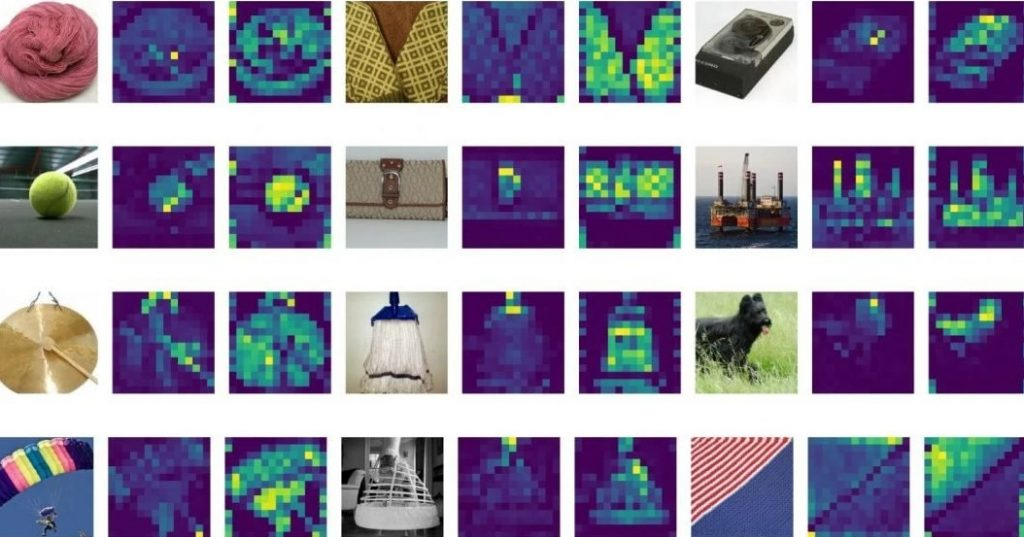

Ảnh gốc (bên trái) và bản đồ Attention của mô hình ViTS/16 (bên phải). Nguồn: Cornell University

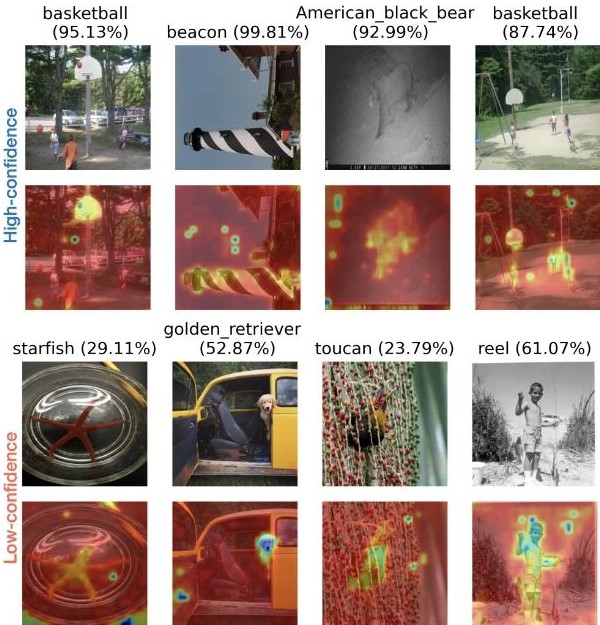

Bản đồ Attention của ViT được trực quan hóa trên hình ảnh từ ImageNet-A. Nguồn: Cornell University

## **3. Kiến trúc Vision Transformer (ViT)**

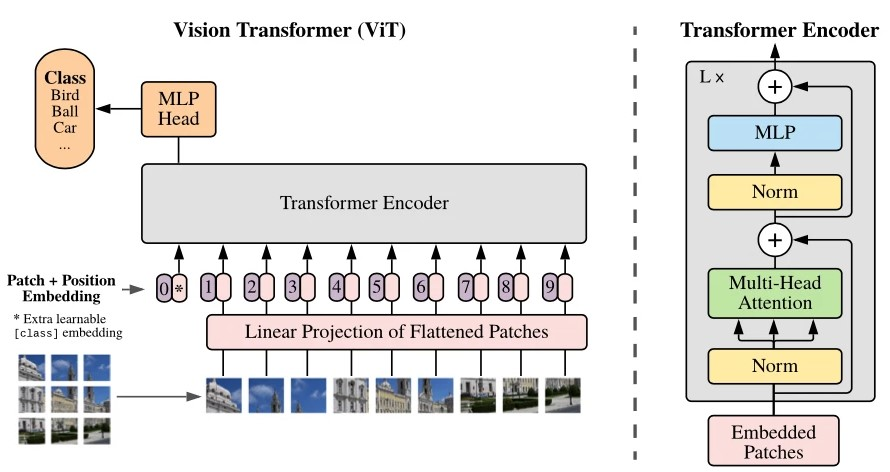

Kiến trúc tổng thể của mô hình ViT được đưa ra như sau theo cách thức từng bước:

1. Chia hình ảnh thành các mảng (patch) với kích thước từng mảng cố định
2. Làm phẳng các mảng hình ảnh 
3. Tạo các feature embedding có chiều thấp hơn từ các mảng hình ảnh phẳng này 
4. Bao gồm thứ tự các mảng   
5. Chuỗi feature embedding được làm đầu vào cho transformer encoder
6. Thực hiện pre-train đối với mô hình ViT với các nhãn hình ảnh, sau đó được giám sát hoàn toàn trên một tập dữ liệu lớn 
7. Tinh chỉnh model trên bộ dữ liệu riêng của từng bài toán

**Lưu ý:** Trong khi kiến ​​trúc ViT đầy đủ là một lựa chọn đầy hứa hẹn cho các tác vụ xử lý thị giác, hiệu suất làm việc của ViT vẫn kém hơn so với các giải pháp thay thế CNN có kích thước tương tự (chẳng hạn như ResNet) khi được huấn luyện từ đầu trên một tập dữ liệu cỡ trung như ImageNet. 

### **3.1 Linear Projection and Flattend Patches**

#### **3.1.1 Patches Embedding**

Input ViT chia ảnh ra thành các phần có kích thước bằng nhau (Patch).

Ví dụ ta có một ảnh kích thước `48x48` ta sẽ chia nhỏ ra thành 9 image patches có kích thước `16x16` 

Đưa các patches về dạng vector bằng cách flattend các patches này ra

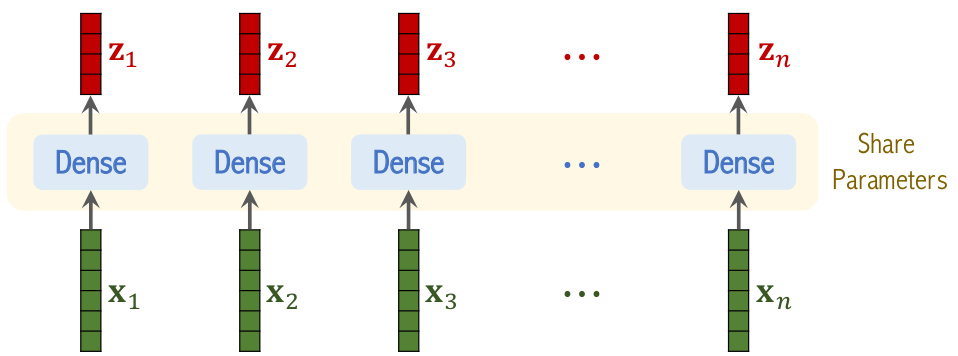

Hình trên mô tả phần Linear Projection. Thực chất Linear Projection là một lớp Dense với đầu vào là flattend vector của các patches, đầu ra sẽ là embeeding vector tương ứng với từng patch.

$$z_i = W*x_i + b$$

Trong đó:
- $x_i$ là flattend vector của patch thứ 
- $z_i$ là output tương ứng của $x_i$ khi qua Linear Projection.
- $W$ được gọi là ma trận embeeding .

#### **3.1.2 Positional Embeding**

Ý tưởng tương tự với mô hình Transformer gốc. Positional embedding trong mô hình ViT sẽ chứa thông tin về vị trí của patch trong ảnh (spatial information). 

#### **3.1.3. Class Embedding**

## **4. Cách hoạt động Vision Transformer(ViT)**

Hiệu suất của ViT phụ thuộc vào các quyết định như của trình tối ưu hóa, độ sâu mạng lưới và siêu tham số cụ thể của tập dữ liệu. So với ViT, CNN dễ dàng tối ưu hóa hơn.

Một mô hình ViT thông thường sử dụng tích chập `16 * 16` với stride 16. Trong khi đó, tích chập `3 * 3` với stride 2 làm tăng độ ổn định và nâng cao độ chính xác.

CNN chuyển đổi các điểm ảnh cơ bản thành một bản đồ đặc trưng. Sau đó, bản đồ đặc trưng được một trình mã hóa thành một chuỗi các tokens, rồi được nhập vào kiến trúc Transformer đó. Mô hình này sau đó áp dụng cơ chế chú ý để tạo ra một chuỗi các tokens đầu ra. Cuối cùng, 1 lớp projector kết nối các tokens đầu ra với bản đồ đặc trưng. Điều này vì vậy giúp làm giảm số lượng tokens cần được học, giảm chi phí đáng kể.

Đặc biệt, nếu mô hình ViT được huấn luyện trên bộ dữ liệu khổng lồ có trên 14 triệu hình ảnh, nó có thể hoạt động tốt hơn CNN. Nếu không, lựa chọn tốt nhất là gắn vào ResNet hoặc EfficientNet. Mô hình ViT được huấn luyện trên một tập dữ liệu khổng lồ trước khi quá trình tinh chỉnh. Thay đổi duy nhất là bỏ qua lớp MLP và thêm một lớp D lần KD * K mới, trong đó K là số lớp của tập dữ liệu nhỏ. 

## **5. Kết luận:**

Mô hình ViT sử dụng Multi-Head Self Attention trong lĩnh vực Thị giác máy tính mà không cần đến hình ảnh về một đồ vật cụ thể. Mô hình này chia hình ảnh lớn ra thành một loạt các mảng hình ảnh nhỏ hơn và được nén lại thành vector theo vị trí của ảnh, sau đó được đưa vào Transformer encoder. Khi làm như vậy, Transformer encoder học được những đặc tính tổng quát và chi tiết có trong ảnh. Cuối cùng, ViT không những có độ chính xác cao hơn trên những dataset lớn, mà còn giảm lượng thời gian cần thiết để huấn luyện mô hình.

## **References**
1. https://viblo.asia/p/vision-transformer-for-image-classification-ORNZqV78l0n
2. Paper: https://arxiv.org/abs/2010.11929
3. https://vinbigdata.com/tong-quan-ve-vision-transformer-vit/